<a href="https://colab.research.google.com/github/Series-Parallel/Machine_in_Learning/blob/main/Stochastic_Gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('WineQT.csv')

In [5]:
data = data.dropna()

In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [7]:
X = data.drop('quality', axis=1)
y = data['quality']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
model = SGDRegressor(max_iter=1000, tol=1e-3)

In [13]:
model.fit(X_train, y_train)

SGDRegressor()

In [14]:
y_pred = model.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)

In [16]:
r2 = r2_score(y_test, y_pred)

In [17]:
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 0.38030472420576766
R2 Score: 0.3165800821713848


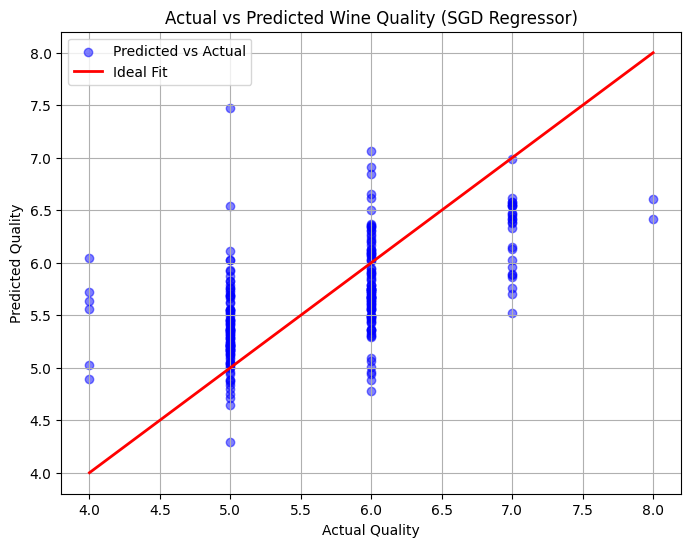

In [18]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label="Ideal Fit")

# Labels and title
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Wine Quality (SGD Regressor)")
plt.legend()
plt.grid()

# Show the plot
plt.show()
